In [ ]:
# CODE FOR DAILY AVERAGED NEUTRAL TEMPERATURE 

In [7]:
import pandas as pd
import numpy as np

# Define file path
file_path = r"C:\Users\parva\OneDrive\Desktop\Paper work\cnof_NT\TIMED_L2A_SABER_1269291.txt"

# Initialize lists to store parsed data
data = {
    "Time": [],
    "Altitude": [],
    "Latitude": [],
    "Longitude": [],
    "Kinetic_Temperature": [],
    "Tangent_Altitude": []
}

# Open and read file line by line
with open(file_path, 'r') as file:
    for line in file:
        values = line.strip().split()
        if len(values) >= 405:  # Adjust based on file's column structure
            try:
                time_value = " ".join(values[0:2])  # Time is the first two entries
                altitude_value = float(values[2])   # Altitude
                latitude_value = float(values[3])   # Latitude
                longitude_value = float(values[4])  # Longitude

                # Handle kinetic temperature and tangent altitude values
                kinetic_temperature_values = [
                    float(v) if v != '-999.00' and float(v) >= 0 else np.nan 
                    for v in values[5:405]
                ]
                tangent_altitude_values = [
                    float(v) if v != '-999.0' else np.nan 
                    for v in values[405:]
                ]

                data["Time"].append(time_value)
                data["Altitude"].append(altitude_value)
                data["Latitude"].append(latitude_value)
                data["Longitude"].append(longitude_value)
                data["Kinetic_Temperature"].append(kinetic_temperature_values)
                data["Tangent_Altitude"].append(tangent_altitude_values)

            except ValueError:
                print(f"Warning: Could not parse line: {line}")

# Convert to DataFrame
df = pd.DataFrame(data)
df['Time'] = pd.to_datetime(df['Time'], dayfirst=True, errors='coerce')

# Define latitude and longitude ranges
lat_range = (-90, 18.66)
lon_range = (232, 342)

# Helper function for kinetic temperature at 110 km
def get_kinetic_temperature_exact_110(tangent_altitudes, kinetic_temperature):
    try:
        closest_index = np.nanargmin(np.abs(np.array(tangent_altitudes) - 110))
        if abs(tangent_altitudes[closest_index] - 110) <= 0.1:
            return kinetic_temperature[closest_index]
        else:
            return np.nan
    except (ValueError, IndexError):
        return np.nan

# Filter data for latitude, longitude, and 110 km kinetic temperature
filtered_data = df[
    (df["Latitude"] >= lat_range[0]) & 
    (df["Latitude"] <= lat_range[1]) & 
    (df["Longitude"] >= lon_range[0]) & 
    (df["Longitude"] <= lon_range[1])
].copy()

filtered_data["Kinetic_Temperature_110km"] = filtered_data.apply(
    lambda row: get_kinetic_temperature_exact_110(row["Tangent_Altitude"], row["Kinetic_Temperature"]),
    axis=1
)

# Drop invalid rows
filtered_data = filtered_data.dropna(subset=["Kinetic_Temperature_110km", "Time"])

# Ensure no negative temperatures are included
filtered_data = filtered_data[filtered_data["Kinetic_Temperature_110km"] >= 0]

# Extract date and group by day
filtered_data['Date'] = filtered_data['Time'].dt.date
daily_average = filtered_data.groupby('Date')['Kinetic_Temperature_110km'].mean().reset_index()
daily_average.columns = ['Date', 'Average_Kinetic_Temperature_110km']

# Save to CSV
output_file = 'daily_average_nt_2009_12.csv'
daily_average.to_csv(output_file, index=False)

# Display results
print("Filtered Data for December:\n", filtered_data[["Time", "Altitude", "Latitude", "Longitude", "Kinetic_Temperature_110km"]])
print("Daily Average Kinetic Temperature:\n", daily_average)
print(f"Daily average kinetic temperature data has been saved to '{output_file}'")


Filtered Data for December:
                          Time  Altitude  Latitude  Longitude  \
49    2009-12-01 00:51:42.912   633.006 -50.06000    313.741   
59    2009-12-01 01:01:29.280   620.691 -16.20650    314.043   
61    2009-12-01 01:03:22.393   619.321  -9.76868    314.929   
62    2009-12-01 01:04:22.682   618.798  -4.48614    315.499   
63    2009-12-01 01:05:32.644   618.356  -2.41664    316.275   
...                       ...       ...       ...        ...   
40488 2009-12-31 23:38:47.552   618.328  -6.24825    245.236   
40489 2009-12-31 23:39:29.964   618.082  -1.98579    245.677   
40491 2009-12-31 23:41:26.073   617.761   4.47796    247.134   
40493 2009-12-31 23:43:18.789   617.948  10.65000    248.868   
40495 2009-12-31 23:45:29.578   618.734  17.66050    251.350   

       Kinetic_Temperature_110km  
49                       322.249  
59                       267.652  
61                       273.299  
62                       273.275  
63                       25

In [8]:
import pandas as pd
import numpy as np

# Define file path
file_path = r"C:\Users\parva\OneDrive\Desktop\Paper work\cnof_NT\TIMED_L2A_SABER_1316450.txt"

# Initialize lists to store parsed data
data = {
    "Time": [],
    "Altitude": [],
    "Latitude": [],
    "Longitude": [],
    "Kinetic_Temperature": [],
    "Tangent_Altitude": []
}

# Open and read file line by line
with open(file_path, 'r') as file:
    for line in file:
        values = line.strip().split()
        if len(values) >= 405:  # Adjust based on file's column structure
            try:
                time_value = " ".join(values[0:2])  # Time is the first two entries
                altitude_value = float(values[2])   # Altitude
                latitude_value = float(values[3])   # Latitude
                longitude_value = float(values[4])  # Longitude

                # Handle kinetic temperature and tangent altitude values
                kinetic_temperature_values = [
                    float(v) if v != '-999.00' and float(v) >= 0 else np.nan 
                    for v in values[5:405]
                ]
                tangent_altitude_values = [
                    float(v) if v != '-999.0' else np.nan 
                    for v in values[405:]
                ]

                data["Time"].append(time_value)
                data["Altitude"].append(altitude_value)
                data["Latitude"].append(latitude_value)
                data["Longitude"].append(longitude_value)
                data["Kinetic_Temperature"].append(kinetic_temperature_values)
                data["Tangent_Altitude"].append(tangent_altitude_values)

            except ValueError:
                print(f"Warning: Could not parse line: {line}")

# Convert to DataFrame
df = pd.DataFrame(data)
df['Time'] = pd.to_datetime(df['Time'], dayfirst=True, errors='coerce')

# Define latitude and longitude ranges
lat_range = (-90, 18.66)
lon_range = (232, 342)

# Helper function for kinetic temperature at 110 km
def get_kinetic_temperature_exact_110(tangent_altitudes, kinetic_temperature):
    try:
        closest_index = np.nanargmin(np.abs(np.array(tangent_altitudes) - 110))
        if abs(tangent_altitudes[closest_index] - 110) <= 0.1:
            return kinetic_temperature[closest_index]
        else:
            return np.nan
    except (ValueError, IndexError):
        return np.nan

# Filter data for latitude, longitude, and 110 km kinetic temperature
filtered_data = df[
    (df["Latitude"] >= lat_range[0]) & 
    (df["Latitude"] <= lat_range[1]) & 
    (df["Longitude"] >= lon_range[0]) & 
    (df["Longitude"] <= lon_range[1])
].copy()

filtered_data["Kinetic_Temperature_110km"] = filtered_data.apply(
    lambda row: get_kinetic_temperature_exact_110(row["Tangent_Altitude"], row["Kinetic_Temperature"]),
    axis=1
)

# Drop invalid rows
filtered_data = filtered_data.dropna(subset=["Kinetic_Temperature_110km", "Time"])

# Ensure no negative temperatures are included
filtered_data = filtered_data[filtered_data["Kinetic_Temperature_110km"] >= 0]

# Extract date and group by day
filtered_data['Date'] = filtered_data['Time'].dt.date
daily_average = filtered_data.groupby('Date')['Kinetic_Temperature_110km'].mean().reset_index()
daily_average.columns = ['Date', 'Average_Kinetic_Temperature_110km']

# Save to CSV
output_file = 'daily_average_nt_2010_01.csv'
daily_average.to_csv(output_file, index=False)

# Display results
print("Filtered Data for January:\n", filtered_data[["Time", "Altitude", "Latitude", "Longitude", "Kinetic_Temperature_110km"]])
print("Daily Average Kinetic Temperature:\n", daily_average)
print(f"Daily average kinetic temperature data has been saved to '{output_file}'")


Filtered Data for January:
                          Time  Altitude   Latitude  Longitude  \
46    2010-01-01 00:47:45.613   641.097 -76.825100    338.458   
115   2010-01-01 01:57:29.150   620.031  16.442700    338.653   
147   2010-01-01 02:29:21.407   641.937 -84.549300    251.555   
215   2010-01-01 03:37:51.038   619.066   5.727860    317.807   
217   2010-01-01 03:39:43.477   619.124  -0.505526    319.382   
...                       ...       ...        ...        ...   
43431 2010-01-31 12:13:47.446   636.797 -45.347300    250.053   
43447 2010-01-31 12:29:31.165   618.977   0.919156    277.609   
43535 2010-01-31 14:01:28.590   623.391 -15.788400    248.306   
43541 2010-01-31 14:07:10.195   618.870   2.876390    253.535   
43543 2010-01-31 14:09:47.314   618.257  11.747900    255.033   

       Kinetic_Temperature_110km  
46                       365.057  
115                      254.029  
147                      323.764  
215                      273.570  
217             

In [9]:
import pandas as pd
import numpy as np

# Define file path
file_path = r"C:\Users\parva\OneDrive\Desktop\Paper work\cnof_NT\TIMED_L2A_SABER_1316144.txt"

# Initialize lists to store parsed data
data = {
    "Time": [],
    "Altitude": [],
    "Latitude": [],
    "Longitude": [],
    "Kinetic_Temperature": [],
    "Tangent_Altitude": []
}

# Open and read file line by line
with open(file_path, 'r') as file:
    for line in file:
        values = line.strip().split()
        if len(values) >= 405:  # Adjust based on file's column structure
            try:
                time_value = " ".join(values[0:2])  # Time is the first two entries
                altitude_value = float(values[2])   # Altitude
                latitude_value = float(values[3])   # Latitude
                longitude_value = float(values[4])  # Longitude

                # Handle kinetic temperature and tangent altitude values
                kinetic_temperature_values = [
                    float(v) if v != '-999.00' and float(v) >= 0 else np.nan 
                    for v in values[5:405]
                ]
                tangent_altitude_values = [
                    float(v) if v != '-999.0' else np.nan 
                    for v in values[405:]
                ]

                data["Time"].append(time_value)
                data["Altitude"].append(altitude_value)
                data["Latitude"].append(latitude_value)
                data["Longitude"].append(longitude_value)
                data["Kinetic_Temperature"].append(kinetic_temperature_values)
                data["Tangent_Altitude"].append(tangent_altitude_values)

            except ValueError:
                print(f"Warning: Could not parse line: {line}")

# Convert to DataFrame
df = pd.DataFrame(data)
df['Time'] = pd.to_datetime(df['Time'], dayfirst=True, errors='coerce')

# Define latitude and longitude ranges
lat_range = (-90, 18.66)
lon_range = (232, 342)

# Helper function for kinetic temperature at 110 km
def get_kinetic_temperature_exact_110(tangent_altitudes, kinetic_temperature):
    try:
        closest_index = np.nanargmin(np.abs(np.array(tangent_altitudes) - 110))
        if abs(tangent_altitudes[closest_index] - 110) <= 0.1:
            return kinetic_temperature[closest_index]
        else:
            return np.nan
    except (ValueError, IndexError):
        return np.nan

# Filter data for latitude, longitude, and 110 km kinetic temperature
filtered_data = df[
    (df["Latitude"] >= lat_range[0]) & 
    (df["Latitude"] <= lat_range[1]) & 
    (df["Longitude"] >= lon_range[0]) & 
    (df["Longitude"] <= lon_range[1])
].copy()

filtered_data["Kinetic_Temperature_110km"] = filtered_data.apply(
    lambda row: get_kinetic_temperature_exact_110(row["Tangent_Altitude"], row["Kinetic_Temperature"]),
    axis=1
)

# Drop invalid rows
filtered_data = filtered_data.dropna(subset=["Kinetic_Temperature_110km", "Time"])

# Ensure no negative temperatures are included
filtered_data = filtered_data[filtered_data["Kinetic_Temperature_110km"] >= 0]

# Extract date and group by day
filtered_data['Date'] = filtered_data['Time'].dt.date
daily_average = filtered_data.groupby('Date')['Kinetic_Temperature_110km'].mean().reset_index()
daily_average.columns = ['Date', 'Average_Kinetic_Temperature_110km']

# Save to CSV
output_file = 'daily_average_nt_2010_02.csv'
daily_average.to_csv(output_file, index=False)

# Display results
print("Filtered Data for February:\n", filtered_data[["Time", "Altitude", "Latitude", "Longitude", "Kinetic_Temperature_110km"]])
print("Daily Average Kinetic Temperature:\n", daily_average)
print(f"Daily average kinetic temperature data has been saved to '{output_file}'")

Filtered Data for February:
                          Time  Altitude  Latitude  Longitude  \
33    2010-02-01 00:34:20.133   618.949  18.47290    316.292   
36    2010-02-01 00:37:41.226   619.006   8.92216    317.845   
39    2010-02-01 00:40:19.348   620.145  -1.80014    319.610   
40    2010-02-01 00:41:29.914   620.971  -3.86141    320.607   
41    2010-02-01 00:42:11.649   621.522  -7.97471    321.231   
...                       ...       ...       ...        ...   
38507 2010-02-27 22:23:14.470   634.703 -41.18220    298.604   
38513 2010-02-27 22:29:13.803   640.343 -52.24350    321.325   
38583 2010-02-27 23:41:17.796   618.494  18.24400    249.672   
38588 2010-02-27 23:46:32.027   619.242   2.34402    252.453   
38598 2010-02-27 23:56:17.032   629.433 -28.74590    264.553   

       Kinetic_Temperature_110km  
33                       267.987  
36                       225.439  
39                       242.581  
40                       213.212  
41                       19

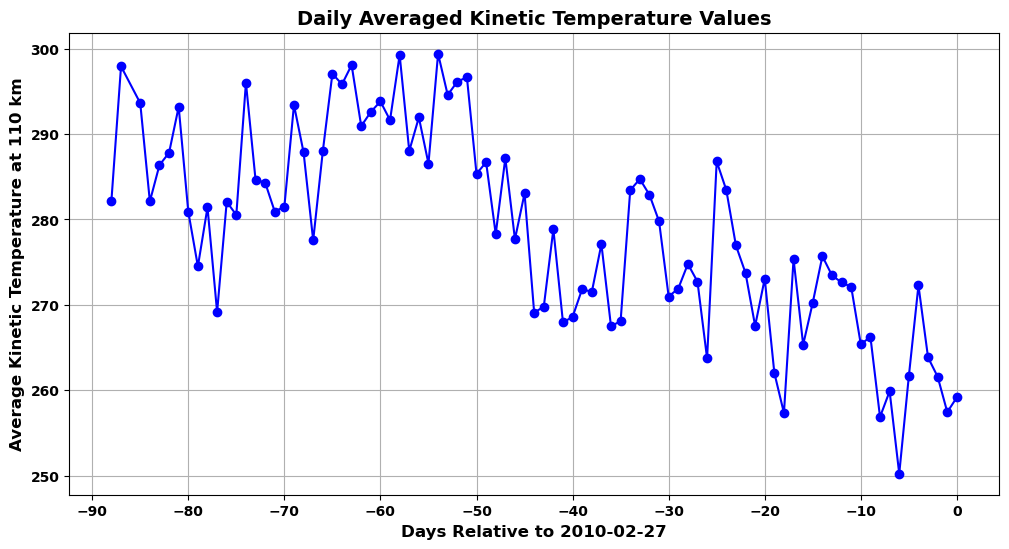

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os

# Define file paths for your three CSV files
file_paths = [
    r"C:\Users\parva\OneDrive\Desktop\Paper work\daily_average_nt_2009_12.csv",
    r"C:\Users\parva\OneDrive\Desktop\Paper work\daily_average_nt_2010_01.csv",
    r"C:\Users\parva\OneDrive\Desktop\Paper work\daily_average_nt_2010_02.csv"
]

# Load and concatenate the CSV files
all_data = [pd.read_csv(file_path) for file_path in file_paths]
combined_df = pd.concat(all_data, ignore_index=True)

# Convert Date column to datetime (adjusted for 'YYYY-MM-DD' format)
combined_df['Date'] = pd.to_datetime(combined_df['Date'], format='%Y-%m-%d')

# Define the end date (February 27, 2010) as day 0
end_date = datetime.strptime("2010-02-27", "%Y-%m-%d")
combined_df['Relative_Day'] = (combined_df['Date'] - end_date).dt.days

# Sort by Relative_Day
combined_df = combined_df.sort_values(by='Relative_Day').reset_index(drop=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Relative_Day'], combined_df['Average_Kinetic_Temperature_110km'], color='blue', marker='o')

# Bold settings for title, axis labels, and tick marks
plt.title('Daily Averaged Kinetic Temperature Values', fontweight='bold', fontsize=14)
plt.xlabel('Days Relative to 2010-02-27', fontweight='bold', fontsize=12)
plt.ylabel('Average Kinetic Temperature at 110 km', fontweight='bold', fontsize=12)

# Customize x-axis ticks to show days from -90 to 0 with intervals of 10, and make tick labels bold
plt.xticks(range(-90, 1, 10), fontweight='bold')
plt.yticks(fontweight='bold')  # Make y-axis tick labels bold


# ax = plt.gca()
# ax.yaxis.get_offset_text().set_fontweight('bold')  # Make the exponent part bold

# Save the figure in the same directory as the input files
directory = os.path.dirname(file_paths[0])
output_path = os.path.join(directory, "kinetic_temperature_plot.png")
plt.savefig(output_path)
plt.grid()
plt.show()